В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
medical_df = pd.read_csv("/Users/shein/ML_course/Data/medical-charges.csv") 
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values
X, y

(array([[18],
        [28],
        [33],
        ...,
        [18],
        [18],
        [21]]),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

In [4]:
X_max = np.max(np.abs(X))
y_max = np.max(np.abs(y))

In [5]:
X = X / X_max
y = y / y_max

In [6]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[1.      , 0.28125 ],
       [1.      , 0.4375  ],
       [1.      , 0.515625],
       ...,
       [1.      , 0.28125 ],
       [1.      , 0.28125 ],
       [1.      , 0.328125]])

In [8]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-0.05666177,  0.46338793])

In [9]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK

array([0.07366608, 0.14607045, 0.18227263, ..., 0.07366608, 0.07366608,
       0.09538739])

In [10]:
rmse_MNK = np.sqrt(mean_squared_error(y, predictions_MNK))
rmse_MNK

np.float64(0.1263188556213116)

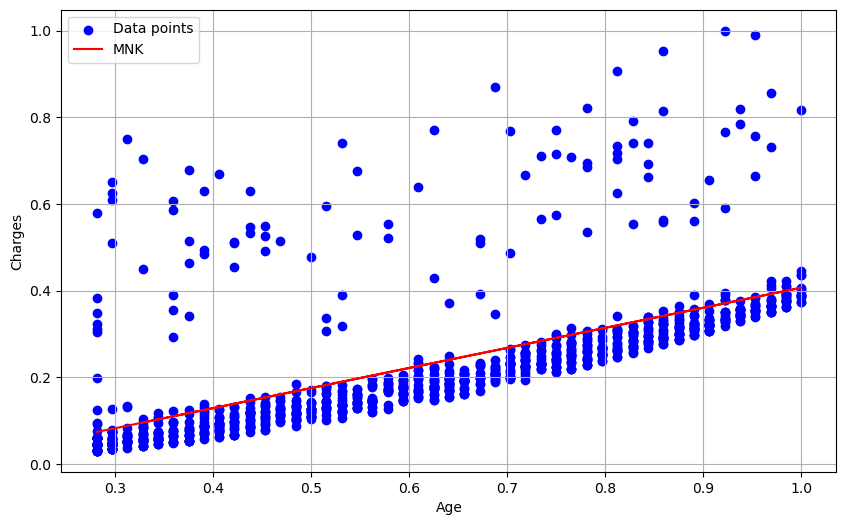

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show();

In [12]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    n, b = 0.0, 0.0  
    m = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = n * X[:, 1] + b
        error = y_pred - y
        errors.append(sum(error**2))
        n_gradient = (2/m) * np.dot(error, X[:, 1])
        b_gradient = (2/m) * np.sum(error)
        n = n - lr * n_gradient
        b = b - lr * b_gradient
    return n, b, errors

In [13]:
n1, b1, errors1 = full_batch_gradient_descent(X_with_intercept, y, lr=0.01, epochs=1000)
predictions_fbgd1 = n1 * X[:, 0] + b1

In [14]:
n1, b1, errors1[:5], predictions_fbgd1[:5] 

(np.float64(0.28616709929814704),
 np.float64(0.056325003901113446),
 [np.float64(83.58701591936155),
  np.float64(80.28001244529469),
  np.float64(77.15413631065319),
  np.float64(74.19944098270292),
  np.float64(71.40652617470226)],
 array([0.1368095 , 0.18152311, 0.20387991, 0.19940855, 0.19493719]))

In [15]:
rmse_fbgd1 = np.sqrt(mean_squared_error(y, predictions_fbgd1))
rmse_fbgd1

np.float64(0.13225461010368833)

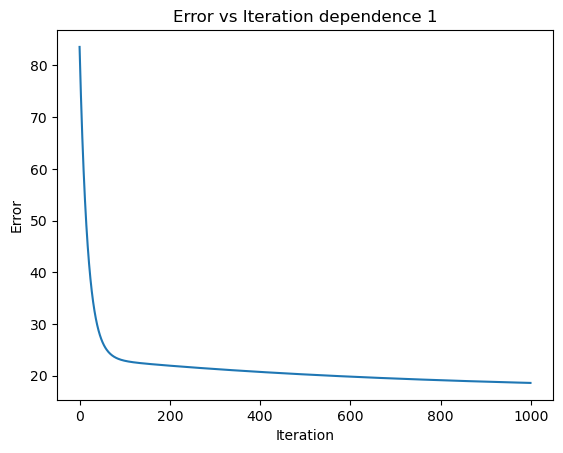

In [16]:
plt.plot(errors1)

plt.title('Error vs Iteration dependence 1')
plt.xlabel('Iteration')
plt.ylabel('Error');

In [17]:
n2, b2, errors2 = full_batch_gradient_descent(X_with_intercept, y, lr=0.001, epochs=1000)
predictions_fbgd2 = n2 * X[:, 0] + b2

In [18]:
n2, b2, errors2[:5], predictions_fbgd2[:5] 

(np.float64(0.12541949402293298),
 np.float64(0.14412281108213776),
 [np.float64(83.58701591936155),
  np.float64(83.25212431352527),
  np.float64(82.91909030590139),
  np.float64(82.58790356591568),
  np.float64(82.25855382044871)],
 array([0.17939704, 0.19899384, 0.20879224, 0.20683256, 0.20487288]))

In [19]:
rmse_fbgd2 = np.sqrt(mean_squared_error(y, predictions_fbgd2))
rmse_fbgd2

np.float64(0.14674517853078556)

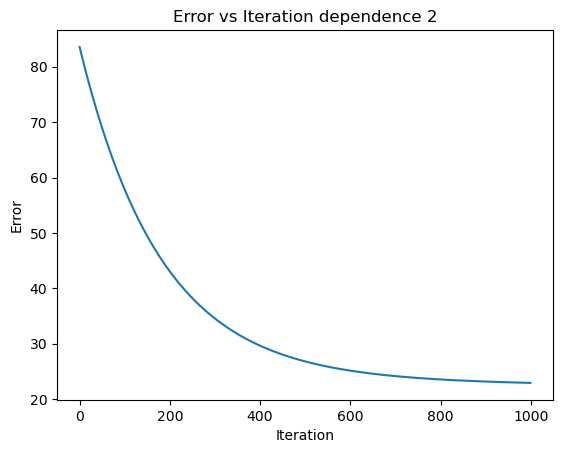

In [20]:
plt.plot(errors2)

plt.title('Error vs Iteration dependence 2')
plt.xlabel('Iteration')
plt.ylabel('Error');

In [21]:
n3, b3, errors3 = full_batch_gradient_descent(X_with_intercept, y, lr=0.05, epochs=1000)
predictions_fbgd3 = n3 * X[:, 0] + b3

In [22]:
n3, b3, errors3[:5], predictions_fbgd3[:5] 

(np.float64(0.4524533089707662),
 np.float64(-0.04969042663399465),
 [np.float64(83.58701591936155),
  np.float64(67.9833893111643),
  np.float64(56.410919815943195),
  np.float64(47.825284146782515),
  np.float64(41.45272450940013)],
 array([0.07756207, 0.1482579 , 0.18360581, 0.17653623, 0.16946664]))

In [23]:
rmse_fbgd3 = np.sqrt(mean_squared_error(y, predictions_fbgd3))
rmse_fbgd3

np.float64(0.12634198160612936)

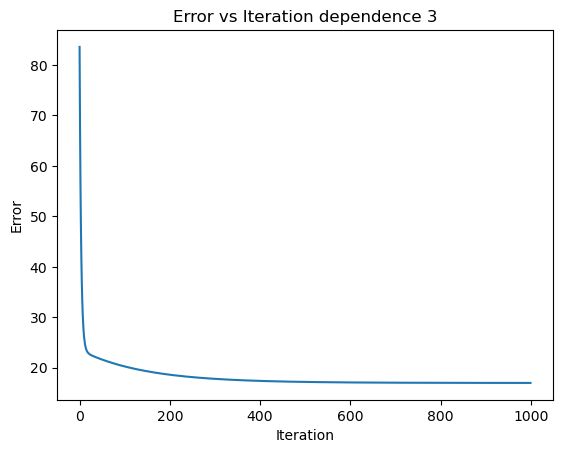

In [24]:
plt.plot(errors3)

plt.title('Error vs Iteration dependence 3')
plt.xlabel('Iteration')
plt.ylabel('Error');

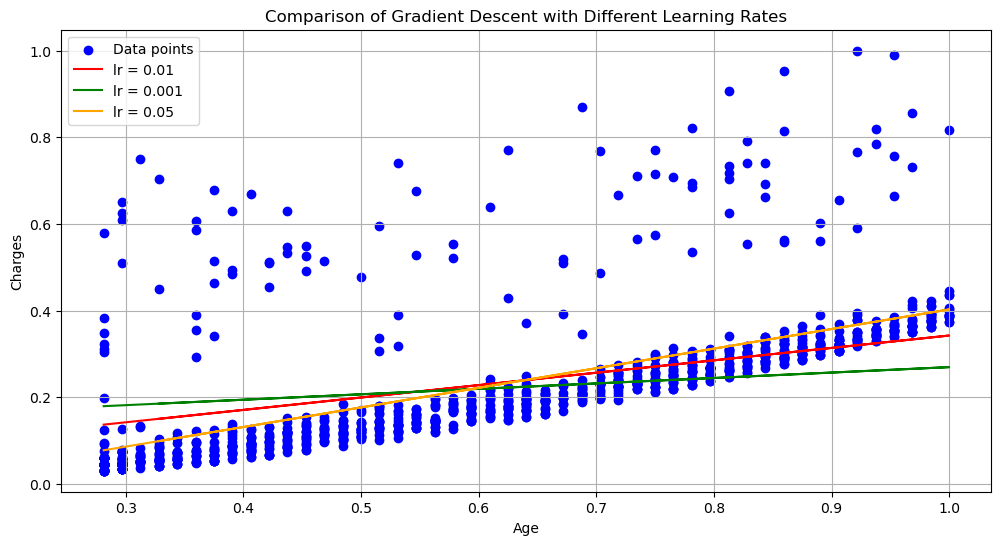

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(X_with_intercept[:, 1], y, color='blue', label='Data points')
plt.plot(X_with_intercept[:, 1], predictions_fbgd1, color='red', label='lr = 0.01')
plt.plot(X_with_intercept[:, 1], predictions_fbgd2, color='green', label='lr = 0.001')
plt.plot(X_with_intercept[:, 1], predictions_fbgd3, color='orange', label='lr = 0.05')
plt.title('Comparison of Gradient Descent with Different Learning Rates')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show();

In [26]:
lin_reg = LinearRegression()

In [27]:
X

array([[0.28125 ],
       [0.4375  ],
       [0.515625],
       ...,
       [0.28125 ],
       [0.28125 ],
       [0.328125]])

In [28]:
lin_reg.fit(X, y)

LinearRegression()

In [29]:
lin_reg_coef = lin_reg.coef_, lin_reg.intercept_
lin_reg_coef

(array([0.46338793]), np.float64(-0.05666177470891759))

In [30]:
predictions_sklearn = lin_reg.predict(X)

In [31]:
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
rmse_sklearn

np.float64(0.1263188556213116)

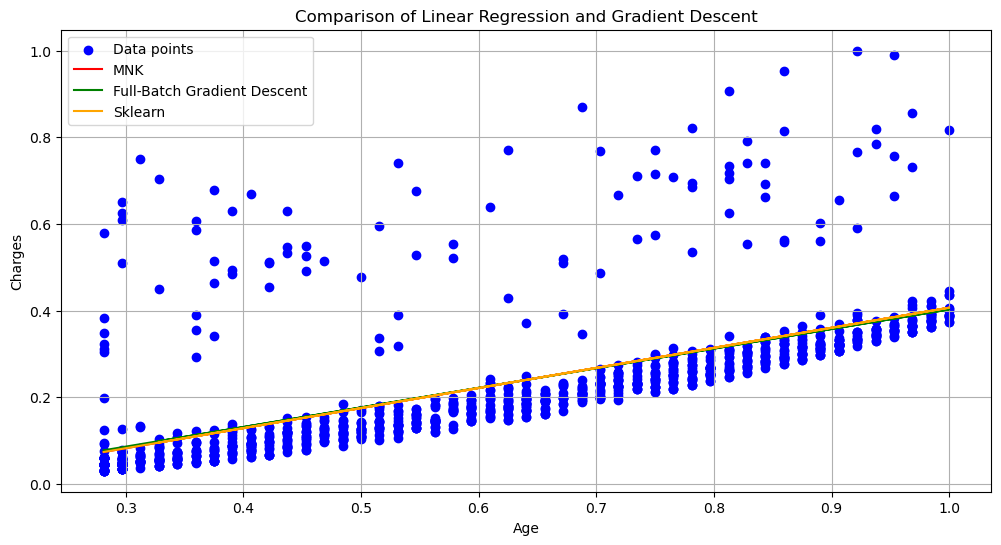

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd3, color='green', label='Full-Batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show();

In [33]:
def print_results(title, data_dict):
    print(f'\n{title}')
    for name, value in data_dict.items():
        print(f"{name}: {value}")

print_results('Коефіцієнти моделі', {'MNK': MNK_coefs, 'Full-Batch Gradient Descent': (n3, b3), 'Scikit-learn': lin_reg_coef})
print_results('Прогнози моделі', {'MNK': predictions_MNK, 'Full-Batch Gradient Descent': predictions_fbgd3, 'Scikit-learn': predictions_sklearn})
print_results('RMSE', {'MNK': rmse_MNK, 'Full-Batch Gradient Descent': rmse_fbgd3, 'Scikit-learn': rmse_sklearn})



Коефіцієнти моделі
MNK: [-0.05666177  0.46338793]
Full-Batch Gradient Descent: (np.float64(0.4524533089707662), np.float64(-0.04969042663399465))
Scikit-learn: (array([0.46338793]), np.float64(-0.05666177470891759))

Прогнози моделі
MNK: [0.07366608 0.14607045 0.18227263 ... 0.07366608 0.07366608 0.09538739]
Full-Batch Gradient Descent: [0.07756207 0.1482579  0.18360581 ... 0.07756207 0.07756207 0.09877082]
Scikit-learn: [0.07366608 0.14607045 0.18227263 ... 0.07366608 0.07366608 0.09538739]

RMSE
MNK: 0.1263188556213116
Full-Batch Gradient Descent: 0.12634198160612936
Scikit-learn: 0.1263188556213116


In [34]:
rmse_real_MNK = rmse_MNK * y_max
rmse_real_fbgd3 = rmse_fbgd3 * y_max
rmse_real_sklearn = rmse_sklearn * y_max

In [35]:
def print_rmse_real(data_dict):
    print('RMSE_real')
    for name, value in data_dict.items():
        print(f'{name}: {value}')

print_rmse_real({'MNK': rmse_real_MNK, 'Full-Batch Gradient Descent': rmse_real_fbgd3, 'Scikit-learn': rmse_real_sklearn})

RMSE_real
MNK: 4662.505766636395
Full-Batch Gradient Descent: 4663.359360797311
Scikit-learn: 4662.505766636395


Результати для моделей, де коефіцієнти підібрані за допомогою методів MNK та лінійної регресії з бібліотеки scikit learn не відрізняються. Це логічно, адже для обчислення лінійної регресії в scikit learn використовується метод MNK. Модель, в якій використовувався метод градієнтного спуску для визначення коефіцієнтів, відрізняється. Проте, значення дуже близькі при значенні learning rate = 0.05. У попередньому завданні, підбираючи параметри мануально, мені вдалось досягти помилки 4673. Отже, результати моделей є дуже близькими до моїх припущень.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [36]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [37]:
X = smoker_df['age'].values.reshape(-1, 1)
y = smoker_df['charges'].values

In [38]:
lin_reg.fit(X, y)

LinearRegression()

In [39]:
lin_reg_coef = lin_reg.coef_, lin_reg.intercept_

In [40]:
predictions_sklearn = lin_reg.predict(X)

In [41]:
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))

In [42]:
rmse_sklearn, lin_reg_coef

(np.float64(10711.00334810241),
 (array([305.23760211]), np.float64(20294.12812691597)))

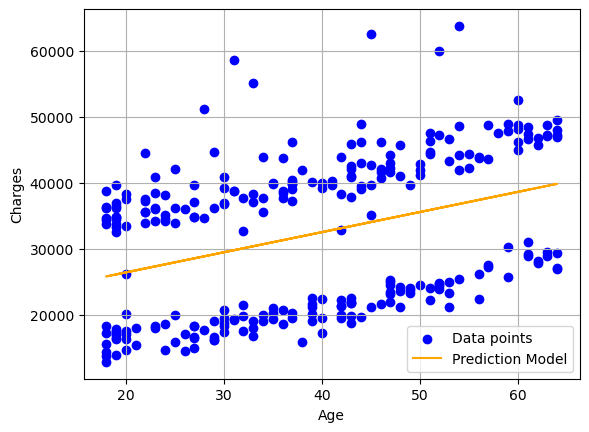

In [43]:
plt.scatter(X[:, 0], y, color = 'blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Prediction Model')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show();

Таку модель недоцільно використовувати на цих даних. Можливо, ми могли б подивитись залежності від інших змінних в дата сеті і окремо проаналізувати цю аномалію розподілу даних. Припускаю, на цих даних може також спрацювати інший метод навчання моделі.